# Lecture Week 3-1

## Topics

## I. Regression -- Fitting for Two Parameters

### &nbsp; &nbsp; &nbsp; &nbsp;  A) Uniform Variance
### &nbsp; &nbsp; &nbsp; &nbsp;  B). Non-uniform Variance
### &nbsp; &nbsp; &nbsp; &nbsp;  C) $\rm{\chi}^2$ Fitting
### &nbsp; &nbsp; &nbsp; &nbsp;  D) Reduced $\rm{\chi}^2$

   
## II. Probability and $\chi^2$ 

### &nbsp; &nbsp; &nbsp; &nbsp;  A) $\chi^2$, PDF, and CDF 


## Lab: 

## Parts 1. and 2.: The remaining 2 parts from last time (Week 2-2) 

## 3. CDF for Data with Non-uniform Variance.

## I. Regression -- Fitting for Two Parameters:

### Let's use a simple example: $x$ is time and $y$ is the temperature.  Our goal is to model how the temperature increases in the morning.  The simplest model for this phenomenon is a straight line.

### We say the data now has "Two Degrees of Freedom (DOF)".

### In the one-parameter problem, the data points (room temperature as measured by $N$ thermometers).  Depending on the actual temperature, all $N$ measurement results can shift up and down together.  That's one degree of freedom.

### Now, imagine plotting the the temperature measurements made at different times vs. time.  The points can certainly still shift up and down together, depending on whether it's a hot day or a cold day.  But they can also tilt, depending on how fast the temperature is rising with time.  Hence, two degrees of freedom.

### Note: Time usually is considered to be measured with much higher accuracy than temperature.  So we take $x$ as given, and treat $y$ as the measurements (Gaussian random numbers).

## Modeling the data as a straight line

That means we think the true relationship between a set of random numbrs (the temperature measurement results) and time is described by a straight line. 

The goal is then to find the slope ($m$) and intercept ($b$) that best fit the data.

Our starting point last time was Question 2 (Week2-2, $\S$ II.D)): First calculate 

$$P(D|T) $$

and then maximize $P(D|T)$ against $T$.  The temperature value that maximizes this probability is our best guess for the true temperature.

This time we will also start from Question 2, except now there are two parameters, so we calcuate

$$P(D|[m, b]) \tag{1}$$

and of course the data will consist of the random numbers:

$$D = \{y_1, y_2, ..., y_N\} = \{ y_i\}$$

Then, we vary $[m, b]$ until the probability of having the measured data be $D$ ($= \{y_i\}$) is maximized.

###*The pair $[m, b]$ that maximizes this probability is our best guess for the true slope and intercept.*

## To find the best-fit $[m, b]$

If you go through the math, you will see that maximizing the probability $P(D|[m, b])$ is the same as *minimizing*


$$ \sum_{i=1}^N {[y_i - f(x_i)]^2}  = \sum_{i=1}^N {[y_i - (mx_i + b)]^2}  \tag{2}$$


where $f(x) = mx + b$, is the linear model.

(Let's think about this result.  It's NOT

$$ \sum_{i=1}^N {[y_i - (mx_i + b)]}$$




This condition is easy to meet: Plot the $(x_i, y_i)$ in a Cartesian coordinate system and find the "center of mass" (CM) of the points -- any line that goes through the CM will satisfy eqn (8).  Because half of the points will be above, and the other half below, such a line.  So we can't find the best-fit line this way.)

The expression in (2) is called the residual sum of squares (RSS), and the problem to minimize RSS is called:

### *Least-squares fitting* 

## Let's begin!

## I.A) Uniform Variance

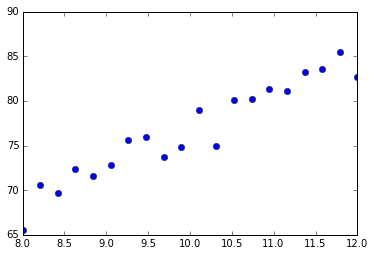

In [4]:
%matplotlib inline
''' 
First simulate data, N pairs of {x_i, y_i} using numpy arrays,

with uniform variance.

'''
import numpy as np
import matplotlib.pyplot as plt

N = 20

x = np.linspace(8, 12, N)
m_true = 4.2
b_true = 35

≠

sig = 1.2

# ---> This line is the key: it simulates the temperature measurements
y = y_true + np.random.randn(x.shape[0]) * sig

# 'x': the plot symbols will be crosses.
plt.plot(x, y, 'o')
plt.show()

## Breakout Exercise: 

## Given [m, b] = [2, 50], calculate the RSS.

## Start by writing a function f(m, b, x) that returns the model values for y (this is basically the f(x) two cells above), given m, b, and an array, x.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 20

x = np.linspace(8, 12, N)
m_true = 4.2
b_true = 35

y_true = m_true * x + b_true 

sig = 1.2

# ---> This line is the key: it simulates the temperature measurements
y = y_true + np.random.randn(x.shape[0]) * sig

# 'x': the plot symbols will be crosses.
plt.plot(x, y, 'o')
plt.show()

## Breakout Exercise: 

## Search through a range of m and b values and find the pair that minimizes RSS.  You can make use of the function f you wrote above.

## You can start by searching for m in the range of (0, 10) and for b in the range of (0, 100) -- 10 steps in each direction. 

## At the end you should have the following statements printed.

The minimum RSS: xx.xxxx.

The best-fit slope and intercept for the simulated data are m = 4.5000 and b = 32.0000.

(The input values are m_true = 4.2000 and b_true = 35.000000).

## Breakout Exercise: 

## Plot the simulated data and the best-fit line in the same plot.

## To include "error bars" in your plot:

-  ## Change plt.plot to plt.errorbar; 

-  ## include yerr =  sig;

-  ## also pay attention to how to format the plotting symbols.

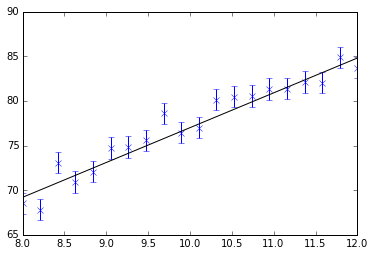

In [191]:
# A better way to tlotting best fit result
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.plot(x, f(m_best, b_best, x), 'k-')
plt.show()

## Important to note: 

- ## The size of the error bars is set by the quantity sig -- the $\sigma$ of the Gaussian, and NOT by how much each point deviates from the best-fit line.  Because rememer, in a real experiment, you don't know m_true and b_true.  The line is plotted according to your *best guess* for the slope and the intercept.

- ## What the error bars tell us is that if the true temperature is anywhere within the range of the error bar, the measured value will have at least a 68% chance of being at the location of the cross (x).  

- ## We think that it's equivalent of saying there is a 68% chance that the true value of the temperature would be within the range indicated by the error bars.

## I.B) Non-uniform Variance

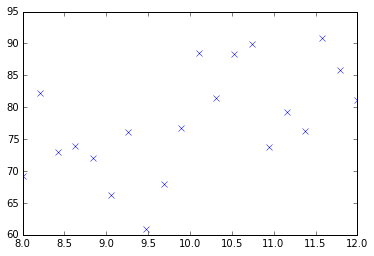

In [193]:
%matplotlib inline
''' 
Simulating data, N pairs of {x_i, y_i}, using numpy arrays, 

with non-uniform variance.

'''
import numpy as np
import matplotlib.pyplot as plt

N = 20

x = np.linspace(8, 12, N)
m_true = 4.2
b_true = 35

y_true = m_true * x + b_true

# specify fractional error, say 10%, which is what occurs for certain experiment.
# If you want to sound like a pro, you say "a signal-to-noise ratio of 10". 
# (or S/N = 10).
sig_frac = 0.10
sig = y_true * sig_frac

# simulate the temperature measurements
y = y_true + np.random.randn(x.shape[0]) * sig

plt.plot(x, y, 'x')
plt.show()

## What do we do now?

## I.C) $\chi^2$-square fitting.


## We follow the same recipe, by minimizing the probability in eqn (1) above.  After a bit of math, we get:

Insteading of minimizing the expression in (2), now we minimize:

$$ \chi^2 = \sum_{i=1}^N {\frac {[y_i - f(x_i)]^2} {\sigma_i^2}}  = \sum_{i=1}^N {\frac{[y_i - (mx_i + b)]^2}  {\sigma_i^2} } \tag{3}$$

This is no longer called least square fitting, but

### $\chi^2$-square fitting.

You can think of this as "weighted least square fitting".  And you can see that for uniform variance $\sigma_i = \sigma$ eqn (3) is reduced to eqn(2), as it should.

But really, even in the case of uniform variance, you should calculate $\chi^2$; you will see why soon.

(*Numerical Recipes 3rd Ed., $\S$15.1*)


Chi Square is: 134.8943


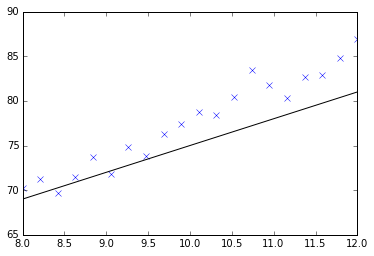

In [217]:
'''
Example of chi^2 fitting.

Given a pair of (m, b) calculate chi^2.

'''

m = 3.
b = 45

def f(m, b, x):
    return m*x + b

y_model = f(m, b, x)

chi2 = ((y - y_model)**2/sig**2).sum()
print("Chi Square is: {:.4f}".format(chi2))
plt.plot(x, y, 'x')
plt.plot(x, f(m, b, x), 'k-')
plt.show()


## Breakout Exercise: 

## Search through a range of m and b values and find the pair that minimizes $\chi^2$.  You can make use of the function f you wrote above.

## You can start by searching for m in the range of (0, 10) and for b in the range of (0, 100) -- 10 steps in each direction. 

## At the end you should have the following statements printed.


The minimum chi^2: xx.xxxx.

The best-fit slope and intercept for the simulated data are m = 3.6000 and b = 42.0000.

(The input values are m_true = 4.2000 and b_true = 35.000000).

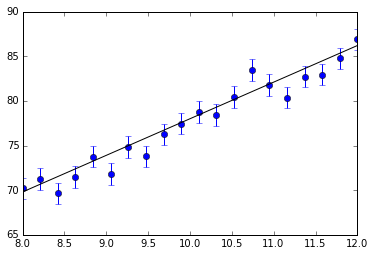

In [219]:
'''
Plotting best-fit results

'''

# ms: marker size
plt.errorbar(x, y, yerr = sig, fmt = 'o', ms = 6) 
plt.plot(x, f(m_best, b_best, x), 'k-')
plt.show()

# 5-min Break

## I.D) Reduced $\chi^2$

## $\chi^2_{\nu} = \frac {\chi^2} {\text{DOF}}$

## Let

## $N$ = number of independent data points, and 

## $n$ = number of fitting parameters.

## Then,

## $\text{DOF} = N - n$

## Imagine if you only have two points, you will always be able to find m and b that will pass through these two points perfectly.  But you know that shouldn't happen because there will always be uncertainty.  Yes you can fit a line perfectly through 2 data points, but you are fitting for both the actual trend and the noise.  

## This happens more often than you think.  It actually has a name:  Overfitting.

## Overfitting results when the number of fitting parameter is comparable to or greater than the number of independent data points.

In [220]:
'''
Reduced chi^2 = chi^2/DOF

Note: For a sample of 20 simulated data points, you may get anything between 0.5 and 1.5.  

This is due to the small number of data points.  

'''

DOF = len(x) - 2
chi2_nu = chi2_min/DOF
print("The reduced chi^2 is {:.4f}".format(chi2_nu))


The reduced chi^2 is 1.2137


## Breakout Excercise:

## Go back to the example of 20 data points with uniform variance and calculate the reduced $\chi^2$

## We can go back further to the case of fitting for one parameter.  Remeber: 50 thermometers measuring room temperature at the same time.  

We can easily calculate $\chi^2_{\nu}$.  First of all,

$$\chi^2 = \sum_{i} { \frac {[t_i - \langle t \rangle]^2} {\sigma_i^2} } \tag {4}$$

Let $N$ be the number of independent data points; the degree of freedom is:

$$ \text{DOF} = \nu = N - 1 $$

We need to subtract 1 because there is *one* fitting parameter.  Then

$$\chi^2_{\nu} = \frac{\chi^2} {N-1} \tag {5}$$

(Again, in the case of only one data point, it's meaningless to compute the average -- the simplest case of overfitting: a horizontal line can be shifted up and down to pass exactly through any one point!)

## In this simplest of all cases, how do we understand why $\chi^2_{\nu}$ should be roughly 1:


If our assumption that noise follows a Gaussian distribution is right, then roughly 2/3 of the times each of the terms

$$\frac{ t_i - \langle t \rangle} {\sigma_i}  \tag{6} $$


is less than 1, and 1/3 of the times they are greater than 1.  But in the sum of $\chi^2$, the terms we are summing is the square of the expression in (6):

$$\left[ \frac{ t_i - \langle t \rangle} {\sigma_i} \right]^2 \tag{7} $$


When a number less than 1 is squared, it's even smaller, but there is a lower bound, 0.  When a number larger than 1 is squared, it's even larger, but there is no bound from above.  So even though only ~1/3 of the times will a term in the form of (7) be larger than 1, they have longer "lever arms" from the number 1.  If there are a large number of terms, those that are greater than 1 exactly balance those that are less than 1.  Thus the average of all the terms in $\chi^2$ (eqn (4)) is 1.  This is essentially what the reduced $\chi^2$ calculates: the average of the terms in the form of (7).  (You may wonder if for computing the average we need $N$ in the denominator of eqn (5) instead of $N-1$.  First of all, if $N$ is large, it makes little difference whether it's $N$ or $N-1$.  For small $N$, well, $N-1$ is correct -- if you actually do the math.).

This is not a proof but rather an intuitive way for you understand why reduced $\chi^2$ should be around 1.

One other way of understanding eqn (4) or the expression in (7): We are basically trying to get a sense of how big the deviations are from our best estimate of the temperature.  It makes sense to measure the deviation for each data point in unit of $\sigma_i$.  

## II. Probability and $\chi^2$ 

## II.A) $\chi^2$, PDF, and CDF 

## Remember we started this whole discussion wanting to calculate and maximize this probability (again using temperature measurement as the example):

## $$P(T|D)\text{,} \tag{8}$$

## and hope to obtain, given data $D$, the most likely value for the true temperature.

## But it turns out we don't know how to calculate the probability in (8).  Instead we calculate and maximize this probability 

## $$P(D|T)\text{,} \tag{9}$$

## and obtain the temperature value for which the data $D$ is the most likely. 

## We then assume the temperature value that maximizes (9) also maximizes (8).

## For one temperature measurement, the probability is (See Week2-2, $\S$ II.A)),


## $$P(t; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ -\frac{ (t - T)^2 } { 2\sigma^2 }} \tag{10}$$	

## For a data set of $N$ measurements,


## $P(D|T) = P(t_1, t_2, t_i,..., t_N; T) = P(t_1; T)P(t_2; T)...P(t_i; T)...P(t_N; T)$ 
## $\hspace{2.75em} = e^{\left[ -\frac{(t_1-T)^2}{2\sigma^2}-\frac{(t_2-T)^2}{2\sigma^2}-...\frac{(t_i-T)^2}{ 2\sigma^2}-...-\frac{(t_N-T)^2}{2\sigma^2} \right]}$

## Or,

## $$P(D|T) = Ae^{-\chi^2/2} \text{,} \tag{11}$$

##where $A = \left( \frac{1}{\sqrt{2\pi\sigma}}\right)^N$ (See $\S$ II.D) of Notebook Week2-2.)

## Eqn (11) is the probability of how likely the data set $D = \{t_i\}$ is going to occur given the temperture is $T$.  When it is integrated over all possible values for $\{t_i\}$, we should get 1, by definition.

## But we will now reinterpret this as a probability for $T$ -- remember we are saying $P(D|T)$ is the same as $P(T|D)$ -- so we will replace the L.H.S. of (11) by $P(T|D)$.

## For the R.H.S. of (11), what's traditionally done is to divide it by $e^{-\chi_\text{min}^2/2}$.  So now we have:

## $$P(T|D) \propto e^{-\Delta\chi^2/2} \text{,} \tag{12}$$

## where $\Delta\chi^2 = \chi^2 - \chi^2_{\text{min}}$.

## The proportionality constant will be determined by requiring that this probability integrated over all possible values of $T$ is 1.

## Computationally, you integrate over a large enough range of $T$ around $T_{best}$ and require the result to be 1.


## This an example of one fitting parameter ($T$).

## In the case of 2 fitting parameters:

## Given $m$ and $b$, the probability of the $i$th measurement being $y_i$ is

## $$\frac{1}{\sqrt{2\pi\sigma}} e^{\frac {[y_i - f(x_i)]^2} {\sigma^2}} = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{[y_i - (mx_i + b)]^2}{\sigma^2} }  \tag{13}$$


## and thus, 

## $P(D|[m, b]) = P(y_1; [m, b])P(y_2; [m, b])...P(y_i; [m, b])...P(y_N; [m, b])$ 
## $\hspace{4.3em} = Ae^{\sum_{i=1}^N {\frac{[y_i - (mx_i + b)]^2}{2\sigma^2}}}$

## Or,

## $$P(D|[m, b]) = Ae^{-\chi^2/2}\text{,} \tag{14}$$

## where, again, $A = \left( \frac{1}{\sqrt{2\pi\sigma}}\right)^N$

## Eqn (14) is the probability of how likely the data set $D = \{y_i\}$ going to occur given the slope and intercept are $[m, b]$.  When it is integrated over all possible values for $\{y_i\}$, we should get 1, by definition.

## But we will now reinterpret this as a probability for $[m, b]$.

## So again, replacing the L.H.S. of (14) by $P([m, b]|D)$ and dividing the R.H.S. by $e^{-\chi_\text{min}^2/2}$, we have:

## $$P([m, b]|D) \propto e^{-\Delta\chi^2/2} \text{,} \tag{15}$$

## The proportionality constant will be determined by requiring that this probability integrated over all possible values of $m$ and $b$ is 1.

## Computationally, you integrate over a large enough area in the $m\text{-}b$ space around the point $(m_{best}, b_{best})$ and require the result to be 1.

# The take away:

## The probability of a model, characterized by a set of parameters, being the correct model for reality is proportional to $e^{-\Delta\chi^2/2}$.

## For the one-parameter example,

## $$P(\text{ model }|\text{ data })= P(T|D) \propto Ae^{-\Delta\chi^2/2} .$$

## For the two-parameter example, 

## $$P(\text{ model }|\text{ data }) = P([m, b]|D) \propto e^{-\Delta\chi^2/2}.$$

## In general,

## $$P(\text{ model }|\text{ data }) \propto e^{-\Delta\chi^2/2} \text{.} \tag{16}$$

## If your model has $n$ parameters, $\text{model}(p_1, p_2,..., p_n)$, the proportionality constant in (16) will be determined by requiring that this probability integrated over all these parameters is 1.


## N.B.: The quantity in the exponent in (16) is $\Delta\chi^2$ and not $\Delta\chi^2_{\nu}$!


## OK, let's do it!

## First, the simplest example, a one-parameter model

## In the example below:

-  ## Get Probability Distribution Function (PDF) from $e^{-\Delta\chi^2/2}$ .  

-  ## We will then calculate the Cumulative Distribution Function, or CDF. 

The mean temperature value is 69.955 deg (expected: 70.000).
The standard deviation of the simulated temperature measurement results are 0.350 deg (expected: 0.500).


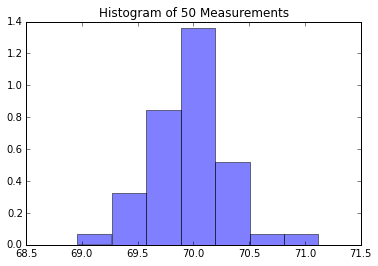

0.01


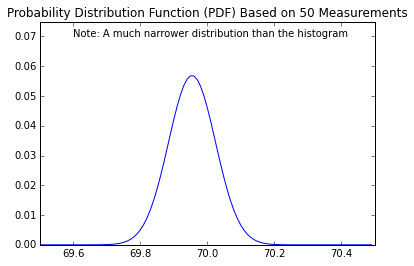

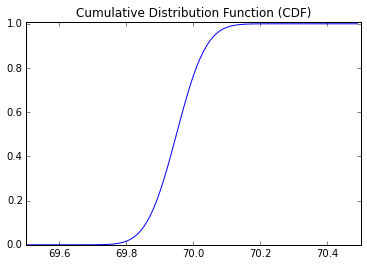

Maximum Value and the sum of PDF: 0.0567942770652, 1.0
Maximum Value of CDF


In [224]:
%matplotlib inline

'''
This is based on the example at the end of Section II of Week2-2.

*******************  IMPORTANT  ***************** 

- The histogram will show the standard deviation of the measurement, 
  independent of the number of measurements (N) --  the standard deviation 
  for the simulated data is roughly the same as sigma; in this case, 0.5.
  
- But you know you can take the mean and it represents a measurement 
  of the temperature with a much smaller uncertainty: sigma/sqrt(N).  
  As you will see, the probability you calculate based on chi^2 reflects 
  that (because the calculation of chi^2 includes all data points).
************************************************** 

'''

import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function


# The first part is copied from Week 2-2 -- 
# just setting things up by simluating temperature measurements

T_true = 70
sigma = 0.5
N = 50

t = np.random.randn(N)*sigma + T_true
t_mean = t.mean()
sig_t = np.std(t)

print("The mean temperature value is {:.3f} deg (expected: {:.3f}).".format(t_mean, T_true))
print("The standard deviation of the simulated temperature measurement \
results are {:.3f} deg (expected: {:.3f}).".format(sig_t, sigma))

plt.figure()
bin_heights, xbins, _ = plt.hist(t, bins = 7, normed = 1, alpha = 0.5)
plt.title('Histogram of {:d} Measurements'.format(N))
plt.show()

# Now the new stuff: PDF and CDF

delT = 0.01
print(delT)

chi2 = []
# I pick a small temperature range, because I know with N = 50, 
# the PDF will have a small spread. You can verify for yourself
# that you can change the breadth of the PDF by varying N.
T_lo, T_hi = 69.5, 70.5
T_vals = np.arange(T_lo, T_hi, delT)
for T in T_vals:
    # We could use the input sigma (which can be measured from looking at instrumentation carefully)
    # But our simulated data set is simple enough and we can use data itself to estimate the sigma, 
    # which, of course, is just sig_t.
    chi2.append(((t - T)**2/(2.*sig_t**2)).sum())

chi2 = np.array(chi2)
P = np.exp(-chi2/2.)

# normalization of PDF
P /= P.sum()
plt.figure()
plt.plot(T_vals, P)

# writing text on the plot
plt.text(69.6, 0.07, "Note: A much narrower distribution than the histogram")

# setting limits for the plot
plt.axis([T_lo, T_hi, 0, 0.075])

# adding a descriptive title 
plt.title('Probability Distribution Function (PDF) Based on {:d} Measurements'.format(N))

# CDF

# Using numpy.cumsum to obtain the cumulative probability.
CDF = np.cumsum(P)
plt.figure()
plt.plot(T_vals, CDF)
plt.axis([T_lo, T_hi, 0., 1+1e-2])
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

# sanity check
print("Maximum Value and the sum of PDF: {}, {}".format(P.max(), P.sum()))
print("Maximum Value of CDF".format(CDF.max()))


## Lab Breakout Exercise:

## First, you may want to copy your class Gaussian from last time to here.


## 1. Generate a set of 50 Gaussian random numbers that represent 50 temperture measurements.  The true temperature is 70 and the measurement uncertainty is different for each of the measurements (let's say you used 50 different thermometers to make the 50 measurements).  Suppose the uncertainties are: 

(0.3, 0.4, 0.15, 0.2, 0.5, 0.6, 0.1, 0.2, 0.15, 0.25,  
0.2, 0.14, 0.35, 0.32, 0.23, 0.7, 1., 0.32, 0.51, 0.5,  
0.3, 0.24, 0.5, 0.33, 0.51, 0.26, 0.31, 0.42, 0.15, 0.25,  
0.13, 0.42, 0.15, 0.2, 0.5, 0.6, 0.1, 0.2, 0.15, 0.25,  
0.32, 0.3, 0.2, 0.4, 0.3, 0.65, 1., 0.2, 0.35, 0.15).  


## Find the weighted mean of the data, and report it as t_mean.

## 2. Repeat 1. above 100 times and report 

## t_MEAN, sig_t_mean, and sig_t_mean_expt.

## Are the values of t_MEAN and sig_t_mean what you would expect?


## 3. Find PDF and CDF and plot both for 1. above.


## End of Week 3-1